In [1]:
import tensorflow as tf
import keras as keras
from keras.layers import *
from keras.models import *

import pandas as pd
import cv2

from matplotlib import pyplot as plt

import sklearn

/home/amit/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("../../data/actor_age/train/train.csv")

In [3]:
train_df.dtypes

ID       object
Class    object
dtype: object

In [4]:
train_df = train_df.iloc[:1000]
train_df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
img_width = 96
img_height = 96
def get_img(img_id):
    # Load as grayscale
    img = cv2.imread('../../data/actor_age/train/Train/' + img_id, cv2.IMREAD_COLOR)
    # Reduce size
    resized = cv2.resize(img, (img_width, img_height))
    return resized

print(train_df['ID'][0])
img = get_img(train_df['ID'][0])
img.shape

377.jpg


(96, 96, 3)

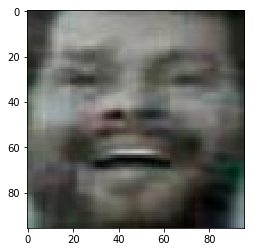

In [6]:
%matplotlib inline
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow('image',img_arr)
plt.imshow(img)

In [7]:
def generate_input(df):
    X = []
    df['ID'].apply(lambda a: X.append(get_img(a)))
    return X

train_X = np.array(generate_input(train_df))
print(train_X.shape)
# train_X.size

(1000, 96, 96, 3)


In [8]:
from sklearn.preprocessing import OneHotEncoder
dict = { 'YOUNG' : 0, 'MIDDLE': 1, 'OLD': 3 }
train_Y = []
train_df['Class'].apply(lambda a: train_Y.append(dict[a]))
train_Y = np.array(train_Y)
# print(train_Y)
# print(tf.one_hot(train_Y, 3))
np.array(tf.one_hot(train_Y, 3))
# print(pd.get_dummies(train_df['Class']))
one_hot_Encoder = OneHotEncoder(sparse=False)
train_Y = np.array(one_hot_Encoder.fit_transform(train_Y.reshape((-1, 1))))
# print(train_Y)
train_Y.shape

(1000, 3)

In [9]:
nb_filters1 = 32
conv1_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(nb_filters1, (conv1_size, conv1_size), padding="same", input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size)))

In [10]:
nb_filter2 = 64
conv2_size = 2

model.add(Conv2D(nb_filter2, (conv2_size, conv2_size), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

In [11]:
num_classes = 3

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        8256      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
__________

In [13]:
model.compile(optimizer='sgd',
             loss='categorical_crossentropy', metrics=['accuracy'])
train_Y.shape

(1000, 3)

In [14]:
model.fit(x=train_X, y=train_Y, epochs=4)

Epoch 1/4
1000/1000 [==============================] - 28s 28ms/step - loss: 7.3028 - acc: 0.5410
Epoch 2/4
1000/1000 [==============================] - 29s 29ms/step - loss: 7.3176 - acc: 0.5460
Epoch 3/4
1000/1000 [==============================] - 30s 30ms/step - loss: 7.3176 - acc: 0.5460
Epoch 4/4
1000/1000 [==============================] - 30s 30ms/step - loss: 7.3176 - acc: 0.5460
